# 项目背景

In [ ]:
数据描述：
ID：编号
Contract：是否有合同
Dependents：是否有家属
DeviceProtection：是否有设备保护
InternetService：是否有互联网服务
MonthlyCharges：月度费用
MultipleLines：是否有多条线路
Partner：是否有配偶
PaymentMethod：付款方式
PhoneService：是否有电话服务
SeniorCitizen：是否为老年人
TVProgram：是否有电视节目
TotalCharges：总费用
gender：用户性别
tenure：任期年数
Churn：用户是否流失


分析目的：
1.预测哪些用户可能流失
2.可能流失的客户有哪些特征

# 数据分析

In [ ]:

a.探索数据的目的：了解数据整体情况并检测异常值，有助于选择合适的数据预处理和分析方式 

b.描述性统计分析是指运用制表、分类、图形以及概括性数据来描述数据特征的各项活动，主要包括集中趋势分析、数据的离散程度分析、数据的频数分布分析等。


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

##  数据处理

###  读取数据

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_noLabel.csv')
test_label1 = pd.read_csv('submit_example.csv')   

# 检查数据集大小
print('各个数据集的维度依次是：train_{},test_{},submission_{}'.format(train.shape,
                                                               test.shape,
                                                               test_label1.shape))

各个数据集的维度依次是：train_(5227, 16),test_(1307, 15),submission_(1307, 2)


In [3]:
train.head(3)

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,24.150000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1505.900000,Male,60,No
1,1,Month-to-month,No,No,Fiber optic,76.142284,Yes,No,Electronic check,Yes,0,No,946.581518,Female,12,Yes
2,2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Yes,Electronic check,Yes,0,No internet service,1077.500000,Female,40,No


In [4]:
test.head(3)

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure
0,5227,Two year,Yes,Yes,Fiber optic,112.25,Yes,Yes,Bank transfer (automatic),Yes,0,Yes,8041.65,Male,72
1,5228,Month-to-month,No,No,DSL,45.10,No,No,Bank transfer (automatic),Yes,0,No,45.10,Male,1
2,5229,One year,No,No,DSL,59.10,No,No,Credit card (automatic),Yes,0,No,772.85,Female,14


In [5]:
# 了解数据的基本情况，查看数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

In [6]:
train.isnull().sum()  # 空值

ID                  0
Contract            0
Dependents          0
DeviceProtection    0
InternetService     0
MonthlyCharges      0
MultipleLines       0
Partner             0
PaymentMethod       0
PhoneService        0
SeniorCitizen       0
TVProgram           0
TotalCharges        0
gender              0
tenure              0
Label               0
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1307 non-null   int64  
 1   Contract          1307 non-null   object 
 2   Dependents        1307 non-null   object 
 3   DeviceProtection  1307 non-null   object 
 4   InternetService   1307 non-null   object 
 5   MonthlyCharges    1307 non-null   float64
 6   MultipleLines     1307 non-null   object 
 7   Partner           1307 non-null   object 
 8   PaymentMethod     1307 non-null   object 
 9   PhoneService      1307 non-null   object 
 10  SeniorCitizen     1307 non-null   int64  
 11  TVProgram         1307 non-null   object 
 12  TotalCharges      1307 non-null   float64
 13  gender            1307 non-null   object 
 14  tenure            1307 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 153.3+ KB


结论：查看数据类型有object、int和float，没有缺失值和空值，但是考虑实际情况，这份数据可能对缺失值和空值进行了处理。

### 描述性统计分析

In [9]:
train.describe(include='all')

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
count,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227.000000,5227,5227.000000,5227
unique,NaN,3,2,3,3,NaN,3,2,4,2,NaN,3,NaN,2,NaN,2
top,NaN,Month-to-month,No,No,Fiber optic,NaN,No,No,Electronic check,Yes,NaN,No,NaN,Female,NaN,No
freq,NaN,3386,4049,2777,2803,NaN,2542,3014,2517,4857,NaN,2292,NaN,2650,NaN,3280
mean,2613.000000,NaN,NaN,NaN,NaN,66.823765,NaN,NaN,NaN,NaN,0.118615,NaN,2084.477153,NaN,28.775971,NaN
std,1509.049259,NaN,NaN,NaN,NaN,28.862749,NaN,NaN,NaN,NaN,0.323366,NaN,2183.825066,NaN,24.293077,NaN
min,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,0.000000,NaN,18.800000,NaN,0.000000,NaN
25%,1306.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,0.000000,NaN,292.979609,NaN,5.000000,NaN
50%,2613.000000,NaN,NaN,NaN,NaN,74.200000,NaN,NaN,NaN,NaN,0.000000,NaN,1218.650000,NaN,23.000000,NaN
75%,3919.500000,NaN,NaN,NaN,NaN,89.900000,NaN,NaN,NaN,NaN,0.000000,NaN,3373.825000,NaN,51.000000,NaN


In [10]:
# 查看分类特征中具体有哪些分类
for col in list(train.columns):
    if type(train[col].unique()[0]) is str:
        print(col,train[col].unique())

Contract ['One year' 'Month-to-month' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No internet service' 'No' 'Yes']
InternetService ['No' 'Fiber optic' 'DSL']
MultipleLines ['Yes' 'No' 'No phone service']
Partner ['Yes' 'No']
PaymentMethod ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']
PhoneService ['Yes' 'No']
TVProgram ['No internet service' 'No' 'Yes']
gender ['Male' 'Female']
Label ['No' 'Yes']


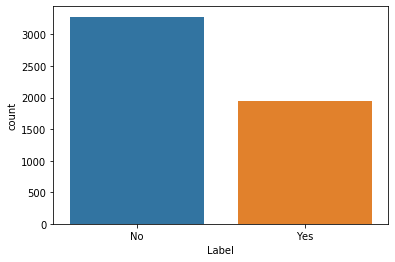

In [12]:
# 检查数据是否平衡
sns.countplot(x='Label',order=['No','Yes'],data=train)

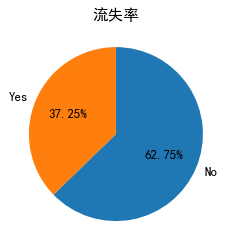

In [13]:
plt.rc('font', family='SimHei', size=13)
fig = plt.figure()
plt.pie(train['Label'].value_counts(),
        labels=train['Label'].value_counts().index,
        autopct='%1.2f%%',startangle = 90,counterclock = False)
plt.title('流失率')
plt.show()



结论一：训练集与测试集几乎是同分布的，因此对训练集好好处理与分析，能够合理应用到测试集上。

结论二：训练集属于不平衡数据集，流失用户比达37.25%，需要进一步从各个特征进行分析


#### 影响客户流失的因素

In [ ]:
根据给出的字段，大致可以分为用户形象、用户使用特点、用户缴费特点三大类，其中：

用户形象：Dependents、Partner、gender、SeniorCitizen(int64)、tenure(int64)

用户使用特点：InternetService、DeviceProtection、TVProgram，MultipleLines、PhoneService

用户缴费特点：Contract、PaymentMethod，TotalCharges(float64)、MonthlyCharges(float64)

##### 用户形象对客户流失的单因子分析

In [14]:
def barplot_percentages(df,feature):
    g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
    g.rename(columns={'Label':'percentage'},inplace=True)
    g.reset_index(inplace=True)
    
    ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    plt.show()

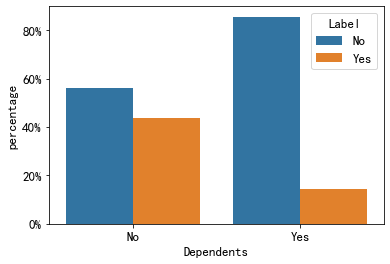

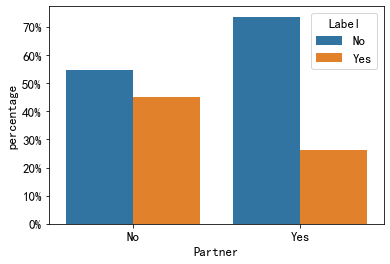

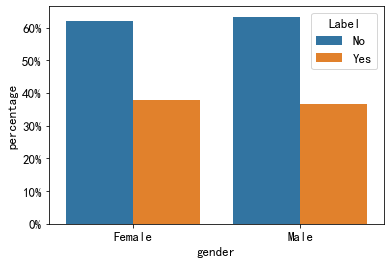

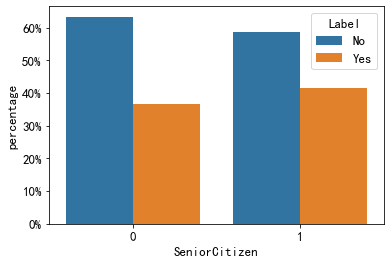

In [15]:
userProfile=train[['Dependents','Partner','gender','SeniorCitizen','Label']]
barplot_percentages(userProfile,'Dependents')
barplot_percentages(userProfile,'Partner')
barplot_percentages(userProfile,'gender')
barplot_percentages(userProfile,'SeniorCitizen')

In [ ]:


结论一：有家属和无家属的客户流失占比相差较大，无家属的客户流失占比更高。

结论二：工作年限越短，客户越容易流失。

结论三：单身的客户流失率比非单身的客户流失率要高。

结论四：男性和女性的客户流失率几乎无差别，说明性别对于客户流失几乎无影响。

结论五：老年人中客户流失占比比非老年人中的客户流失占比相对要高，但是二者相差也不太大，说明是否为老年人对客户流失有弱影响。


##### 用户使用特点对客户流失的单因子分析

In [16]:
userUsageFeatures=train[['InternetService','DeviceProtection','TVProgram','MultipleLines','PhoneService','Label']]

In [17]:
def multi_barplot_percentages(df,features):
    plt.figure(figsize=(12,12))
    fig=plt.subplot()
    cnt=0
    for feature in features:
        g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
        g.rename(columns={'Label':'percentage'},inplace=True)
        g.reset_index(inplace=True)
        
        plt.subplot(321+cnt)
        ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        cnt+=1
    plt.show()

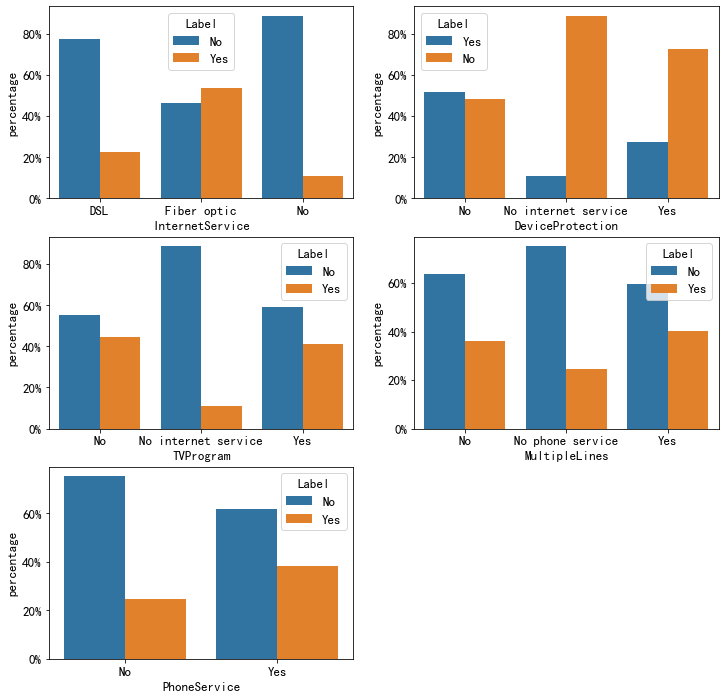

In [18]:
multi_barplot_percentages(userUsageFeatures,['InternetService','DeviceProtection','TVProgram','MultipleLines','PhoneService'])

In [ ]:
结论：
在上网服务（InternetService）,设备安全（DeviceProtection）,电视节目（TVProgram）,多线服务（MultipleLines）,电话服务（PhoneService）这五项中，
电话相关的两项服务多线服务（MultipleLines）和电话服务（PhoneService）的分类中，客户流失占比的差距相对较小。

##### 用户缴费特点对客户流失的单因子分析

In [19]:
userPaymentFeatures=train[['Contract','PaymentMethod',
                           'TotalCharges','MonthlyCharges','tenure','Label']]

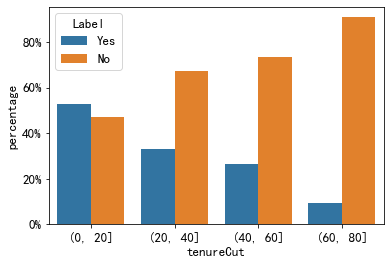

In [20]:
userPaymentFeatures['tenureCut'] = pd.cut(userPaymentFeatures.tenure,bins = [0, 20, 40, 60, 80])
userPaymentFeatures.drop(columns = ['tenure'], inplace = True)
userPaymentFeatures.head()
barplot_percentages(userPaymentFeatures, 'tenureCut')

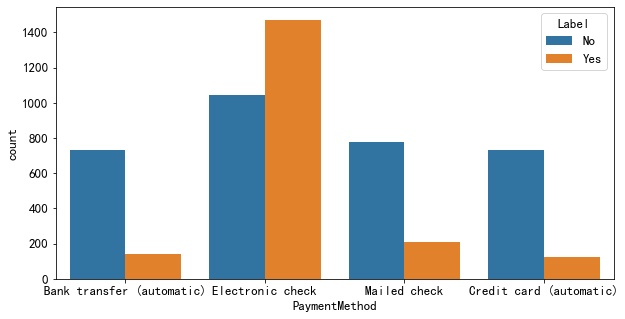

In [21]:
plt.figure(figsize=(10,5))
sns.countplot('PaymentMethod', hue='Label', data=userPaymentFeatures)
plt.show()

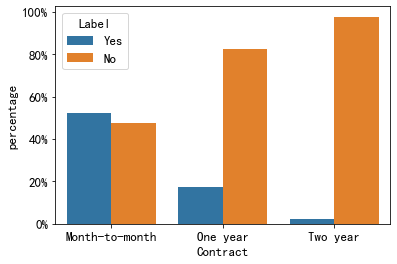

In [22]:
barplot_percentages(userPaymentFeatures,'Contract')

##### 对数值型特征数据采用核密度函数进行分析

In [23]:
def kdeplot(df,feature):
    plt.figure()
    ax1=sns.kdeplot(df[df['Label']=='No'][feature],label='Label:No')
    ax1=sns.kdeplot(df[df['Label']=='Yes'][feature],label='Label:Yes')
    plt.title('KDE for {}'.format(feature))
    plt.show()

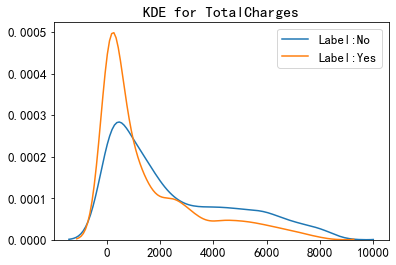

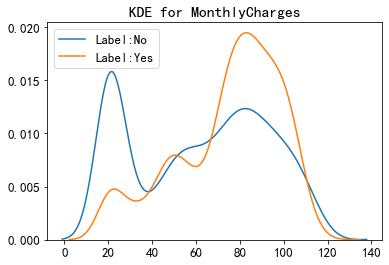

In [24]:
kdeplot(userPaymentFeatures,'TotalCharges')
kdeplot(userPaymentFeatures,'MonthlyCharges')

In [ ]:


结论一：在支付方式（PaymentMethod）中，电子支付最容易流失客户。

结论二：合同签约期（Contract）越长的用户越不容易流失。

结论三：总费用（TotalCharges）较低时容易流失客户。

结论四：月费（MonthlyCharges）越高越容易流失客户。


In [ ]:
从上述三个维度来看，可以有如下结论：

客户属性：无伴侣、无家属的客户流失率较高

服务属性：接入光纤网络、无设备保护的客户流失率较高

客户消费属性：合同期短、电子支付方式、上网时间短的客户流失率高，此外，月费越高客户流失率越高

In [ ]:
建议：

1.针对用户：现如今单身似乎是一种趋势，对于单身客户，可考虑推出某些活动增强单身客户粘性，比如参考现有的一些家庭套餐、学校套餐等，是否可以考虑“朋友圈”套餐来推广流量套餐等。

2.针对服务：设备保护力度需要提高，可以考虑与网络服务和互联网相关行业合作

3.针对客户缴费：月费越高越容易流失客户是很显而易见的，降低客户流失的目的就是提高客户留存，为了提高客户粘性，因此可以考虑两种思路——一种是适当调整月费或者对于月付客户提供一些让利反馈活动，另一种是在对于年付的优惠活动力度加大，使得年付与月付的差距更明显，尽量将月付客户往年付转化。


In [ ]:
从上述分析中选出相关特征Dependents、Partner、tenure(int64)、InternetService、DeviceProtection、TVProgram、Contract、PaymentMethod、TotalCharges(float64)、MonthlyCharges(float64)

# 建模

训练集处理

In [25]:
# 丢弃无关特征
data=train.drop(['ID','SeniorCitizen','gender','TVProgram','PhoneService','MultipleLines','Label'],axis=1)
data.head()

,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,Partner,PaymentMethod,TotalCharges,tenure
0,One year,No,No internet service,No,24.150000,Yes,Bank transfer (automatic),1505.900000,60
1,Month-to-month,No,No,Fiber optic,76.142284,No,Electronic check,946.581518,12
2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Electronic check,1077.500000,40
3,Two year,Yes,No internet service,No,24.650000,Yes,Bank transfer (automatic),1138.800000,45
4,Month-to-month,Yes,No internet service,No,19.150000,Yes,Mailed check,477.600000,25


In [26]:
# 离散特征转换
data_dummy = pd.get_dummies(data)
Label_mapDict={'Yes':1,'No':0}
data_dummy['Label']=train['Label'].map(Label_mapDict)
data_dummy.head()

,MonthlyCharges,TotalCharges,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Label
0,24.150000,1505.900000,60,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,0
1,76.142284,946.581518,12,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,26.200000,1077.500000,40,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,24.650000,1138.800000,45,0,0,1,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
4,19.150000,477.600000,25,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


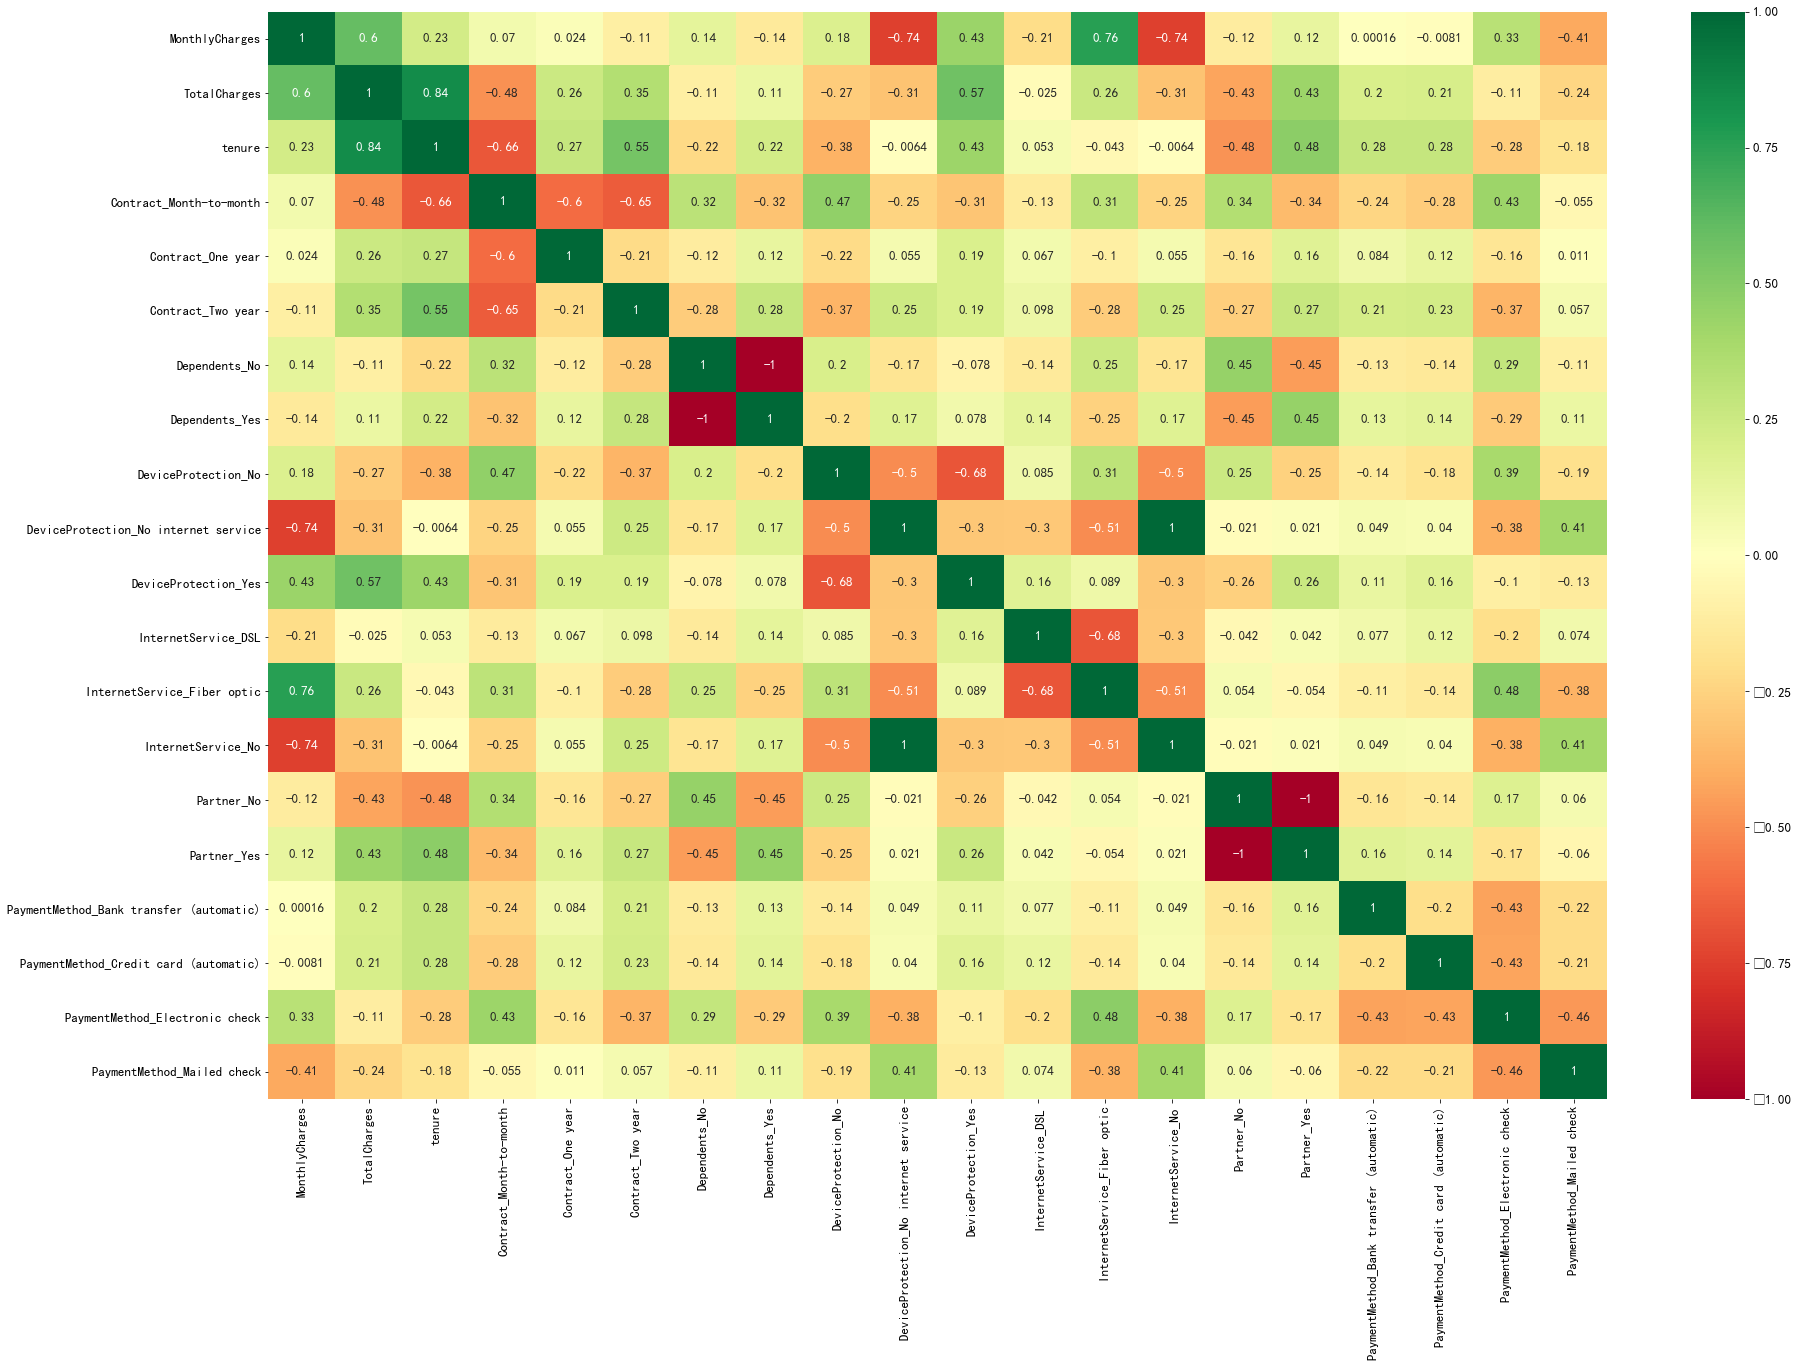

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(data_dummy.drop(['Label'],axis=1).corr(), 
            xticklabels=data_dummy.drop(['Label'],axis=1).columns, 
            yticklabels=data_dummy.drop(['Label'],axis=1).columns, 
            cmap='RdYlGn',annot=True)
plt.show()

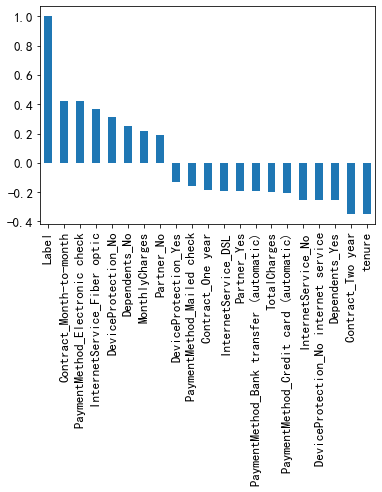

In [28]:
# 查看单个特征与Label的关联性
#plt.rc('font', family='SimHei', size=13)
plt.rcParams['axes.unicode_minus'] =False  # 显示负号
plt.figure()
data_dummy.corr()['Label'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [29]:
#划分训练集和验证集
X = data_dummy.drop('Label',axis=1)
y = train['Label'].map({'Yes':1,'No':0})

In [30]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [32]:
# 导入模型

from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支持向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.ensemble import AdaBoostClassifier     # AdaBoost
from xgboost.sklearn import XGBClassifier           # Xgboost
from lightgbm.sklearn import LGBMClassifier         # lightgbm

In [33]:
# 构建模型

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def check_model(X_train,y_train,clf,clf_name,parameters,k_fold,metrics='accuracy'):
    # 管道机制使得参数集在新数据集（比如测试集）上的重复使用，管道机制实现了对全部步骤的流式化封装和管理。
    pipeline = Pipeline([('scaler',MinMaxScaler()),(clf_name,clf)])
    
    # k折采样
    #folder = KFold(n_splits=k_fold, shuffle=True)
    # 分层k折采样
    folder = StratifiedKFold(n_splits=k_fold, shuffle=True)
    
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=parameters,
                               cv=folder,
                               scoring=metrics)
    gs=grid_search.fit(X_train,y_train)
    print('GridSearch 最优参数：{}，最优分数：{}'.format(gs.best_params_,gs.best_score_))
    return gs

In [35]:
# SVM
num_folds=10
svc = SVC()
svc_parameters = {'svc__C':[0.01,0.03,0.1,1], 'svc__gamma':[0.01,0.1,1]}
svc_model = check_model(X_train,y_train,svc,'svc',svc_parameters,num_folds)
y_pred = svc_model.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'svc__C': 1, 'svc__gamma': 1}，最优分数：0.7641645065147138
0.7523900573613767


In [36]:
# 决策树
num_folds=10
dt = DecisionTreeClassifier()
dt_parameters = {'dt__max_depth':[4,5,6,7,9]}
dt_model = check_model(X_train,y_train,dt,'dt',dt_parameters,num_folds)
y_pred = dt_model.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'dt__max_depth': 5}，最优分数：0.7687111029907161
0.7695984703632888


In [37]:
# Xgboost
num_folds=10
xgb = XGBClassifier()
xgb_parameters = {'xgboost__max_depth':range(4,10),
                  'xgboost__learning_rate':[0.001,0.01,0.02,0.03,1]}
xgb_model = check_model(X_train,y_train,xgb,'xgboost',xgb_parameters,num_folds)
y_pred = xgb_model.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'xgboost__learning_rate': 0.03, 'xgboost__max_depth': 5}，最优分数：0.7744675748820958
0.760038240917782


In [38]:
# lightgbm
num_folds=7
lgb = LGBMClassifier()
lgb_parameters = {'lgb__max_depth':range(4,10),
                  'lgb__learning_rate':[0.001,0.01,0.02,0.03,1]}
lgb_model = check_model(X_train,y_train,lgb,'lgb',lgb_parameters,num_folds)
y_pred = lgb_model.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'lgb__learning_rate': 0.03, 'lgb__max_depth': 8}，最优分数：0.7742154793716952
0.7562141491395793


In [39]:
def testPredict(testDF, clf, clfName):
    submission=testDF.drop(['ID','SeniorCitizen','gender','TVProgram','PhoneService','MultipleLines'],axis=1)
    submission_dummy=pd.get_dummies(submission)
    
    preds=clf.predict(submission_dummy)   # 预测
    predDF=pd.DataFrame()
    predDF['ID']=testDF['ID']
    predDF['Label']=pd.Series(preds).map({1:'Yes',0:'No'})

    output=clfName+'_results.csv'
    predDF.to_csv(output,index=False)  # 保存为csv文件

In [40]:
testPredict(test, xgb_model, 'xgb')

In [41]:
testPredict(test,lgb_model,'lgb')